In [1]:
import gym
import roboschool
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('seaborn-white')
from expert import *

In [2]:
env = gym.make("RoboschoolInvertedPendulum-v1")
env.seed(0)
np.random.seed(0)

[2018-02-11 20:46:05,925] Making new env: RoboschoolInvertedPendulum-v1


In [3]:
agent = SmallReactivePolicy(env.observation_space, env.action_space) # declare sample trained agent
repeat_times = 1000
observation_history = []
score_list = []
r2_list = []
for _ in range(repeat_times):
        observation = env.reset()
        done = False
        count_epi = 0
        score = 0
        s2 = 0
        while done == False:
            action = agent.act(observation) # collect traj and agent current policy
            observation_, reward, done, info = env.step(action)
            observation = observation_
            r2 = np.abs(observation[3])-0.08
            observation_history.append(observation)
            score = score + reward
            # number of step before exit the simulation
            count_epi = count_epi + 1
            s2 = s2 + r2
        score_list.append(score)
        r2_list.append(s2)

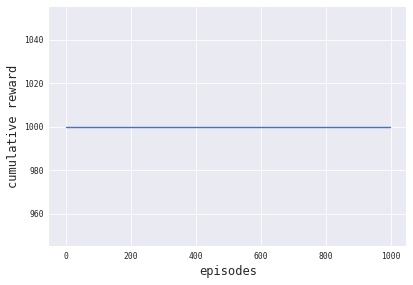

In [4]:
fon_size = 17
sns.set(context = "paper", font = "monospace")
font_size = 12
plt.plot(score_list)
plt.xlabel('episodes', fontsize = font_size)
plt.ylabel('cumulative reward',fontsize = font_size)
plt.show()

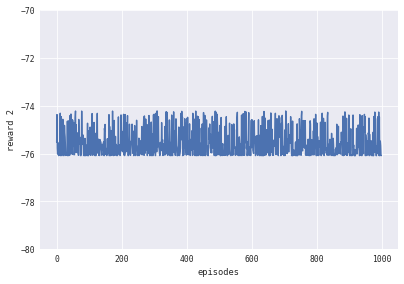

In [5]:
plt.plot(r2_list)
plt.xlabel('episodes')
plt.ylabel('reward 2')
plt.ylim((-80,-70))
plt.show()

# Sensor data statistics

In [6]:
sensor_array = np.array(observation_history)
sensor_array.shape

(1000000, 5)

In [7]:
np.mean(sensor_array, 0)

array([ -3.76366611e-01,  -2.44187517e-02,   9.99967235e-01,
        -1.78625591e-03,  -1.94374099e-04])

In [8]:
np.var(sensor_array, 0)

array([  2.02903017e-02,   5.93905016e-03,   2.81864114e-08,
         6.23098587e-05,   5.73805441e-04])

In [9]:
np.std(sensor_array, 0)

array([ 0.14244403,  0.07706523,  0.00016789,  0.00789366,  0.02395424])

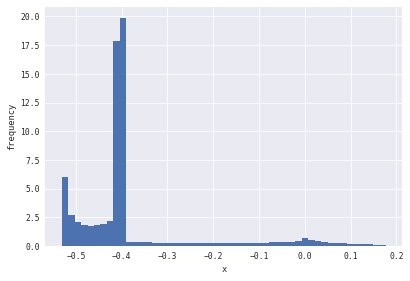

In [10]:
bin_num = 50
plt.hist(sensor_array[:,0], bins = bin_num, normed = True)
plt.xlabel('x')
plt.ylabel('frequency')
plt.show()

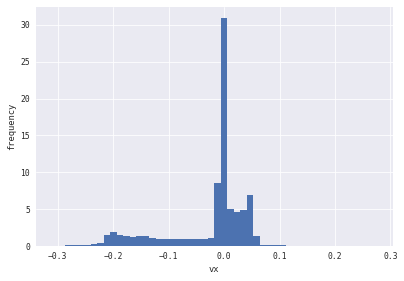

In [11]:
plt.hist(sensor_array[:,1], bins = bin_num, normed = True)
plt.xlabel('vx')
plt.ylabel('frequency')
plt.show()

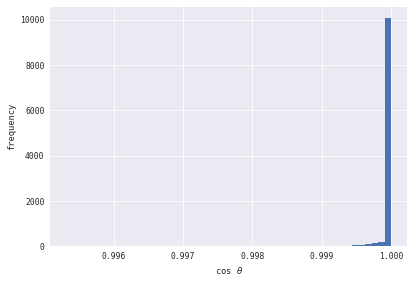

In [12]:
plt.hist(sensor_array[:,2], bins = bin_num, normed = True)
plt.xlabel(r'cos $\theta$')
plt.ylabel('frequency')
plt.show()

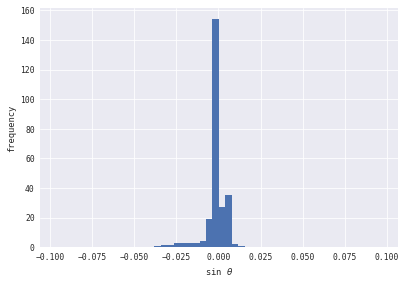

In [13]:
plt.hist(sensor_array[:,3], bins = bin_num, normed = True)
plt.xlabel(r'sin $\theta$')
plt.ylabel('frequency')
plt.show()

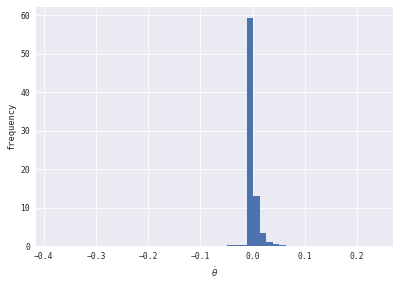

In [14]:
plt.hist(sensor_array[:,4], bins = bin_num, normed = True)
plt.xlabel(r'$\dot \theta$')
plt.ylabel('frequency')
plt.show()

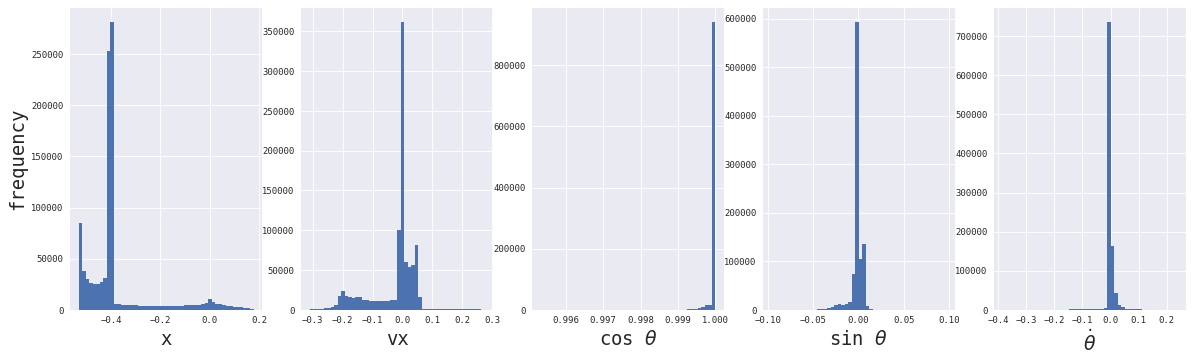

In [15]:
fon_size = 17
sns.set(context = "paper", font = "monospace")
fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,5,1)
plt.hist(sensor_array[:,0], bins = bin_num)
plt.xlabel('x', fontsize=fon_size)
plt.ylabel('frequency', fontsize=fon_size)

plt.subplot(1,5,2)
plt.hist(sensor_array[:,1], bins = bin_num)
plt.xlabel('vx', fontsize=fon_size)

plt.subplot(1,5,3)
plt.hist(sensor_array[:,2], bins = bin_num)
plt.xlabel(r'cos $\theta$', fontsize=fon_size)

plt.subplot(1,5,4)
plt.hist(sensor_array[:,3], bins = bin_num)
plt.xlabel(r'sin $\theta$', fontsize=fon_size)

plt.subplot(1,5,5)
plt.hist(sensor_array[:,4], bins = bin_num)
plt.xlabel(r'$\dot \theta$', fontsize=fon_size)

plt.show()

# Sensor correlation

In [16]:
sensor_pd = pd.DataFrame(sensor_array)
sensor_pd.columns = ['x', 'vx','cos', 'sin','dot_theta']
sensor_pd.names = ['x', 'vx','cos', 'sin','dot_theta']
sensor_pd.head()

,x,vx,cos,sin,dot_theta
0,-0.001786,-0.108245,0.996314,-0.085781,0.196436
1,-0.003705,-0.116315,0.996571,-0.082743,0.184793
2,-0.005797,-0.126762,0.996811,-0.079796,0.179172
3,-0.008068,-0.137642,0.997038,-0.076910,0.175480
4,-0.010515,-0.148307,0.997253,-0.074074,0.172342


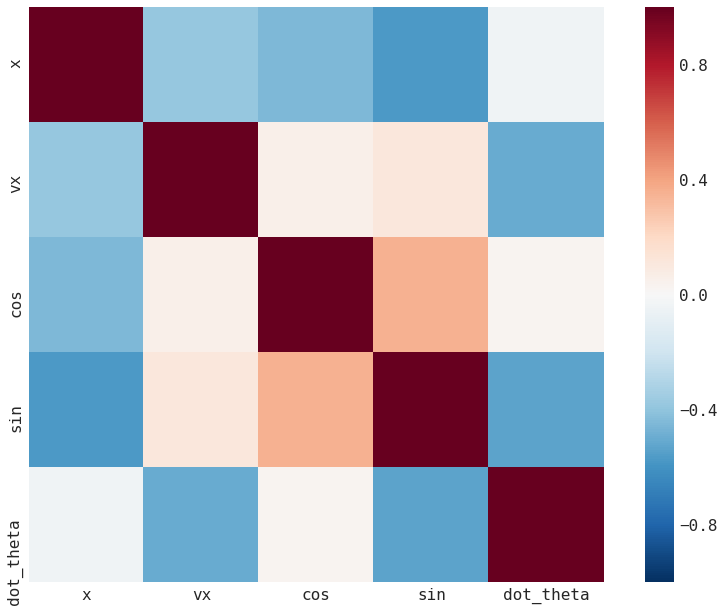

In [17]:
correlations = sensor_pd.corr()
sns.set(context = "paper", font = "monospace", font_scale=2)
corrmat = correlations.values
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))
# Draw the heatmap using seaborn
sns.heatmap(corrmat, square = True, xticklabels =  ['x', 'vx','cos', 'sin','dot_theta'], 
            yticklabels =  ['x', 'vx','cos', 'sin','dot_theta'])
f.tight_layout()
plt.show()